## Import statements

In [2]:
from itertools import product, count

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load the data preprocessed

In [16]:
data = np.load('./preprocessed-data.npz')
X, y, y_labels = data['X'], data['y'], data['y_labels']
alphabet, ids = data['alphabet'], data['ids'].item()

## Analyze the data (captcha text labels)

In [31]:
print('The next characters are not present in the captcha images: ')

print(', '.join([alphabet[k] for k in list(frozenset(range(0, 36)) - frozenset(np.unique(np.unique(y_labels))))]))

The next characters are not present in the captcha images: 
a, 9, h, i, j, k, l, o, q, r, s, t, u, v, z, 0, 1


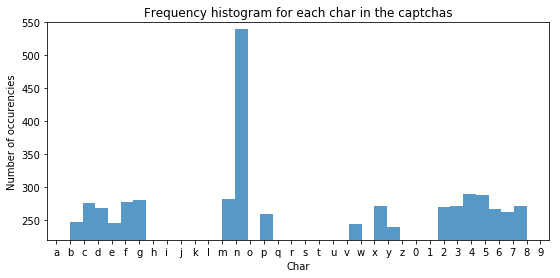

In [114]:
fig = plt.figure(figsize=(9,4))
plt.hist(y_labels.flatten(), bins=36, alpha=0.75);
plt.title('Frequency histogram for each char in the captchas')
plt.xlabel('Char')
plt.ylabel('Number of occurencies')
plt.xticks(range(0, 36))
plt.ylim((220, 550))
plt.gca().set_xticklabels(alphabet);

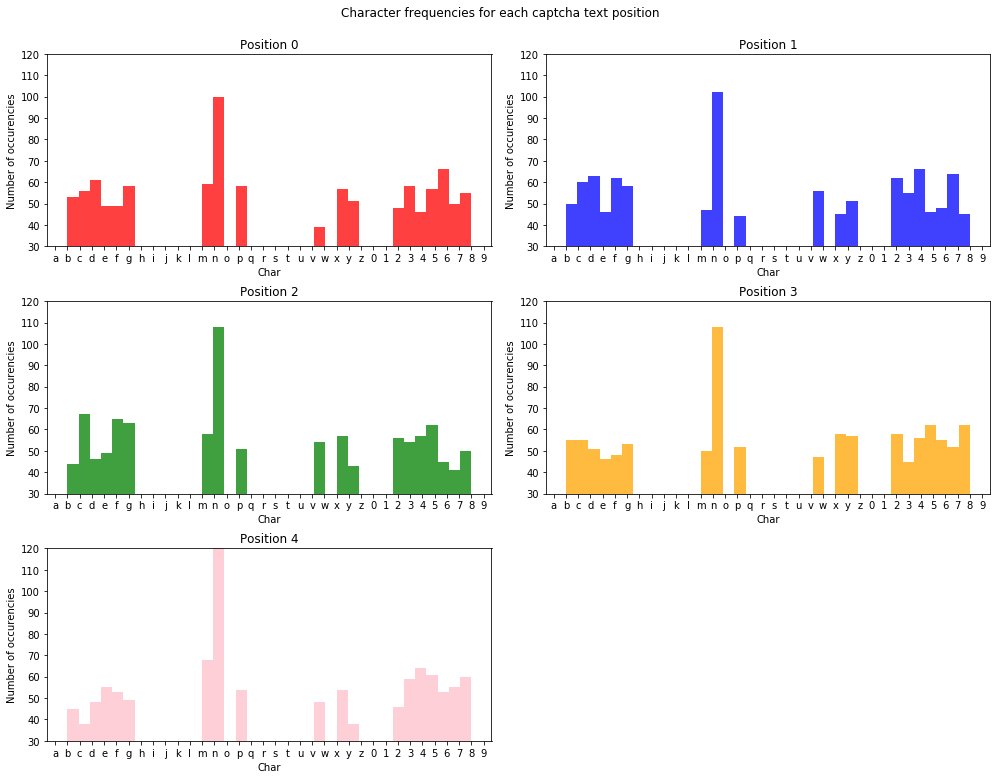

In [117]:
fig, ax = plt.subplots(3, 2, figsize=(14, 11))
for k, color in zip(range(0, 5), ('red', 'blue', 'green', 'orange', 'pink')):
    plt.sca(ax[k // 2, k % 2])
    plt.hist(y_labels[:,k], bins=36, color=color, alpha=0.75);
    plt.title('Position {}'.format(k))
    plt.xlabel('Char')
    plt.ylabel('Number of occurencies')
    plt.ylim((30, 120))
    plt.xticks(range(0, 36))
    plt.gca().set_xticklabels(alphabet);

plt.suptitle('Character frequencies for each captcha text position')
ax[2,1].set_visible(False)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

In [118]:
y.shape

(1070, 5, 36)

Text(0, 0.5, 'Number of occurrences')

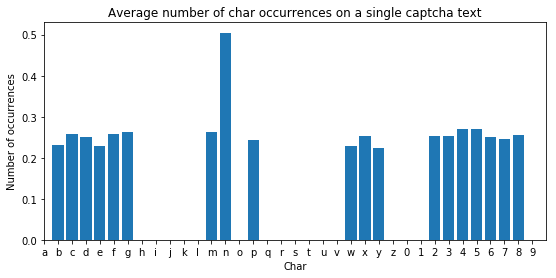

In [107]:
plt.figure(figsize=(9, 4))
plt.bar(range(0, 36), np.mean(y.sum(axis=1), axis=0))
plt.xlim((0, 36))
plt.xticks(range(0, 36))
plt.gca().set_xticklabels(alphabet);
plt.title('Average number of char occurrences on a single captcha text');
plt.xlabel('Char')
plt.ylabel('Number of occurrences')

### Conclusions

We can reduce the alphabet removing the characters that are not present in the captchas texts. That will reduce the number of char categories. Also we can add more examples where the missing digits and letters are included <br/>

Missing characters are: a, 9, h, i, j, k, l, o, q, r, s, t, u, v, z, 0, 1 <br/>

It could be a good idea to split the dataset into training and test sets so that the number of occurencies of each char in both sets are similar